In [115]:
import numpy as np
import os
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

In [116]:
choices = ["H", "T"]
n_trials = 40
data_path=os.path.join("Heads_tails","heads_tails_data.npz")
'''
x=np.array([ np.random.choice(choices, n_trials, p=[0.5, 0.5], replace=True) for _ in range(5)])
print(np.count_nonzero(x == choices[0]))
for xi in x:
    for j in range(n_trials):
        print(j,":",xi[j])
    print()

np.savez("data_path", x=x)'''
x=np.array(np.load(data_path)["x"])

In [117]:
for i in range(len(x)):
    print(np.count_nonzero(x[i] == choices[0]))

22
20
22
16
18


In [118]:

response_file=os.path.join("Heads_tails","responses.txt")

responses=np.zeros((2,len(x),n_trials),dtype=str)
with open(response_file, "r") as f:
    for s_id,subject in enumerate(responses):
        f.readline()
        for trial in subject:
            for i in range(n_trials):
                trial[i]=f.read(1)
        f.readline()


In [119]:
def d_prime_criterea(Hit_rate,False_alarm_rate):
    F=stats.norm.ppf(False_alarm_rate)
    H=stats.norm.ppf(Hit_rate)
    criterion=-F
    d_prime=H-F
    bias=-(F+H)/2
    return d_prime,criterion,bias
def Hits_False_alarms(actual,response):
    positive_actual=np.count_nonzero(actual == choices[0])
    negative_actual=len(actual)-positive_actual
    HR=np.count_nonzero(actual[response == choices[0]] == choices[0])/positive_actual
    FAR=np.count_nonzero(actual[response == choices[0]] == choices[1])/negative_actual
    return HR,FAR

hf=np.zeros((responses.shape[0],responses.shape[1],2))
dc=np.zeros((responses.shape[0],responses.shape[1],3))
for i in range(responses.shape[0]):
    for j in range(responses.shape[1]):
        hf[i,j,:]=Hits_False_alarms(x[j],responses[i,j,:])
        dc[i,j,:]=d_prime_criterea(hf[i,j,0],hf[i,j,1])

In [120]:
print(dc[:,:,0])

[[-0.33307882  0.25965912  0.025525    0.31863936 -0.1397103 ]
 [ 0.316542    0.39873917  0.4752705   0.          0.63097184]]


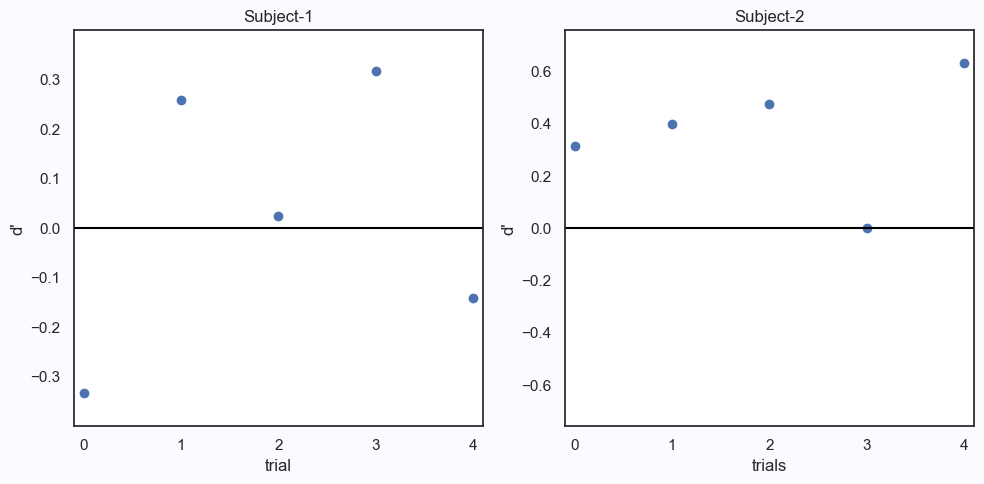

In [121]:
 # lets scatter plot the d' values
sns.set_theme(style="white")
fig, ax = plt.subplots(1,2,figsize=(10,5))
ax[0].scatter(range(len(dc[0,:,0])),dc[0,:,0])
ax[0].set_title("Subject-1")
ax[0].set_xlabel("trial")
ax[0].set_ylabel("d'")
ax[1].scatter(range(len(dc[1,:,0])),dc[1,:,0])
ax[1].set_title("Subject-2")
ax[1].set_xlabel("trials")
ax[1].set_ylabel("d'")
# we want x=0 line
ax[0].hlines(0,-0.1,4.1,color="black")
#let us center the y axis at 0
ax[0].set_ylim(-np.abs(dc[0,:,0]).max()*1.2,np.abs(dc[0,:,0]).max()*1.2)
ax[0].set_xlim(-0.1,4.1)
ax[1].hlines(0,-0.1,4.1,color="black")
ax[1].set_ylim(-np.abs(dc[1,:,0]).max()*1.2,np.abs(dc[1,:,0]).max()*1.2)
ax[1].set_xlim(-0.1,4.1)
# set face color to gray for fig
fig.set_facecolor([0.98,0.98,1])

fig.tight_layout()

In [122]:
for i in range(responses.shape[0]):
    print("subject-",i+1,end="\t")
    print(f"d' :{np.mean(dc[i,:,0]):.2f} +-{np.std(dc[i,:,0]):.2f}")



subject- 1	d' :0.03 +-0.24
subject- 2	d' :0.36 +-0.21
